# Event Detection in Time Series

A time-series is a (time) indexed collection/series of data e.g. (in tuple format) we can have (0, 2.4), (1, 3.1), (2, 5.6) ..... (1000, 1.2)

Here the first element in the tuple is the (time) index and the second element is the associated value of a phenomenon we are analysing, say readings from a temperature sensor.

## Context

Consider two time series, P & M with the same set of indices ranging from 0 to N. 

* M is a impluse/spike time series with specific values occuring at distinct time points (see thick green line below).

* P is a square wave time series (see blue line below) where the series stays at 0 then rises to a high value and then falls back to zero (a window of low-high-low / a square pulse).

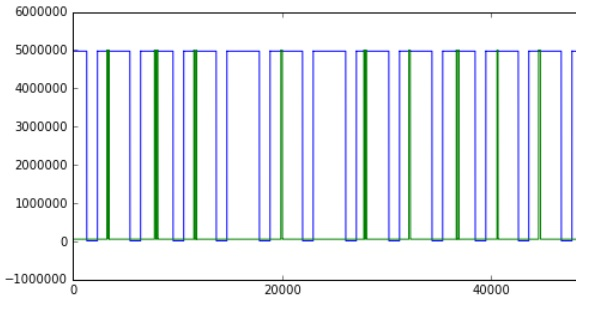

In [1]:
from IPython.display import Image
Image(filename = 'a_tale_of_two_time_series.jpg', width=500, height=500)

The impulses in P only occur between the square waveform in M, if they do occur (some square waves are empty in the above)

## Problem Statement

A. Synthesize a dataset comprising of one instance of P and M each as a numpy array of suitable large length.

Note: You can use Numpy random to randomly select if a spike is present in a window.

Then,

B. Write a function to build a collection of all possible tuples as [(tS, tE, mA, tM), ....]

* tS : The time index when the square waveform changes from 0 to a large value i.e. waveform start.
* tE : The time index when the square waveform changes for large value to 0 i.e. waveform end.
* mA : A boolean which states if a impulse (Green spike) is present between (tS, tE).
* tM : The time index of the impluse (Green spike).    

## Solution

In [2]:
data = []
state = 0.0
for i in range(1201):
    if i % 30 == 0:
        if state == 0.0:
            state = 1.0
        else:
            state = 0.0
    data.append(state)

In [3]:
import pandas as pd
%matplotlib inline
p = pd.Series(data)
#p.plot(figsize = (22, 4))

In [4]:
changes_indices = []

for i in p:
    changes_indices = [0] + list(idx for idx,(i, j) in enumerate(zip(p, p[1:]), 1) if i != j) + [-1]

In [5]:
import random
draw_spike = [0.0] * 1220
for i in changes_indices:
    flip_coin = random.randint(0, 1)
    if flip_coin:
        if p.iloc[i] == 1.0:
            draw_spike[i+15] = 1.0      

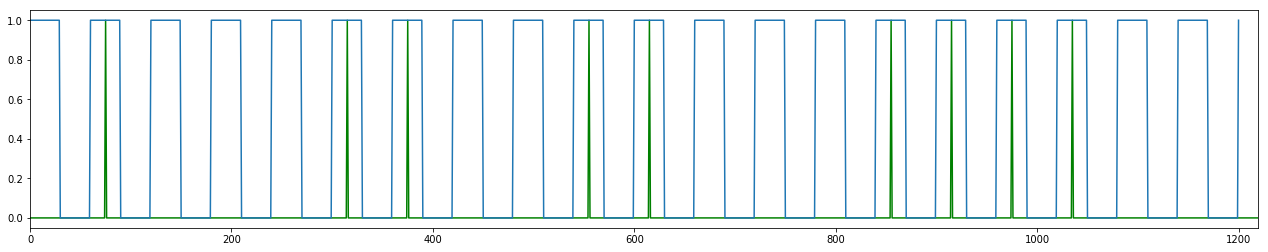

In [6]:
m_series = pd.Series(draw_spike)
ax = m_series.plot(figsize = (5, 4), color='green')
p.plot(figsize = (22, 4), ax=ax)

In [7]:
import numpy as np
ti = np.array(changes_indices)
time_series = np.reshape(ti, (-1, 2))
time_series

array([[   0,   30],
       [  60,   90],
       [ 120,  150],
       [ 180,  210],
       [ 240,  270],
       [ 300,  330],
       [ 360,  390],
       [ 420,  450],
       [ 480,  510],
       [ 540,  570],
       [ 600,  630],
       [ 660,  690],
       [ 720,  750],
       [ 780,  810],
       [ 840,  870],
       [ 900,  930],
       [ 960,  990],
       [1020, 1050],
       [1080, 1110],
       [1140, 1170],
       [1200,   -1]])

In [8]:
m = m_series[m_series.values == 1.0]

## Problem Statement A:
Synthesize a dataset comprising of one instance of P and M each as a numpy array of suitable large length.

In [9]:
p_m_dataset = []

for i in range(15):
    index = random.choice(time_series)
    for j in m.index:
        if(j > index[0] and j < index[1]):
            p_m_dataset.append([index[0], j])

In [10]:
PM_series = np.array(p_m_dataset)
PM_series

array([[ 600,  615],
       [ 960,  975],
       [1020, 1035],
       [ 960,  975],
       [ 600,  615]], dtype=int64)

## Problem Statement B:
Write a function to build a collection of all possible tuples as [(tS, tE, mA, tM), ....]
* tS : The time index when the square waveform changes from 0 to a large value i.e. waveform start.
* tE : The time index when the square waveform changes for large value to 0 i.e. waveform end.
* mA : A boolean which states if a impulse (Green spike) is present between (tS, tE).
* tM : The time index of the impluse (Green spike). 

In [11]:
def get_data_collection(time_series, m):
    data_collection = []
    for i in time_series:
        for j in m.index:
            if(j > i[0] and j < i[1]):
                data_collection.append((i[0], i[1], True, j))
                break
        else:
            data_collection.append((i[0], i[1], False, -1))
            
    return data_collection

In [12]:
data_tuples = get_data_collection(time_series, m)
data_tuples

[(0, 30, False, -1),
 (60, 90, True, 75),
 (120, 150, False, -1),
 (180, 210, False, -1),
 (240, 270, False, -1),
 (300, 330, True, 315),
 (360, 390, True, 375),
 (420, 450, False, -1),
 (480, 510, False, -1),
 (540, 570, True, 555),
 (600, 630, True, 615),
 (660, 690, False, -1),
 (720, 750, False, -1),
 (780, 810, False, -1),
 (840, 870, True, 855),
 (900, 930, True, 915),
 (960, 990, True, 975),
 (1020, 1050, True, 1035),
 (1080, 1110, False, -1),
 (1140, 1170, False, -1),
 (1200, -1, False, -1)]